In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg

## СЛАУ

**1. Решите линейную систему:**

$\left(
\begin{array}{cccc}
1 & 2 & 3\\
4 & 0 & 6\\
7 & 8 & 9\end{array}
\right)\cdot X = \left(\begin{array}{cccc}
4\\1\\10\end{array}\right)
$

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

**2. Найдите псевдорешение:**

x + 2y – z = 1

3x – 4y = 7

8x – 5y + 2z = 12

2x – 5z = 7

11x +4y – 7z = 15

In [3]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, -5, 0], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 1.15601029, -0.889718  , -0.85029782]),
 array([0.66772534]),
 3,
 array([14.89650167, 10.4695886 ,  2.73531577]))

Результат псевдорешения: x = 1.15601029, y = -0.889718  , z = -0.85029782

**3. Сколько решений имеет линейная система:**

$\left(
\begin{array}{cccc}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\end{array}
\right)\cdot X = \left(\begin{array}{cccc}
12\\2\\1\end{array}\right)
$

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

In [4]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A,B.T), axis=1)
print (C)
np.linalg.matrix_rank(A), np.linalg.matrix_rank(C)

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]


(2, 3)

Система имеет решения, если ранг матрицы А равен рангу расширенной матрицы С. Т.к. они не равны, то решений нет.

Изменим вектор B.

In [5]:
B = np.array([1, 1, 1])
C = np.concatenate((A, np.array([B]).T), axis=1)
print (C)
np.linalg.matrix_rank(A), np.linalg.matrix_rank(C)

[[1 2 3 1]
 [4 5 6 1]
 [7 8 9 1]]


(2, 2)

In [6]:
np.linalg.solve(A, B)

array([ 0.2, -1.4,  1.2])

**4. Вычислите LU-разложение матрицы:**

$
\left(
\begin{array}{cccc}
1 & 2 & 3\\
2 & 16 & 21\\
4 & 28 & 73\end{array}
\right)
$

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [7]:
A = np.array([
    [1, 2, 3],
    [2, 16, 21],
    [4, 28, 73],
])
P, L, U = scipy.linalg.lu(A)

print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [8]:
B = np.array([4, 1, 7])
np.linalg.solve(A, B)

array([ 5.12962963, -0.67592593,  0.07407407])

**5. Найдите нормальное псевдорешение недоопределенной системы:**

x + 2y – z = 1

8x – 5y + 2z = 12

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.

**Решение.**

Из (1): x = 1 - 2y + z. (3)

Подставим (1) в (2):

8(1 - 2y + z) - 5y + 2z = 12,

-21y + 10z = 4,

**z = 0.4 + 2.1y.**

Подтавим в (3):

x = 1 - 2y + 0.4 + 2.1y,

**x = 1.4 + 0.1y.**

$V = \left(
\begin{array}{cccc}
1.4 + 0.1U\\
U\\
0.4 + 2.1U\end{array}
\right)
$


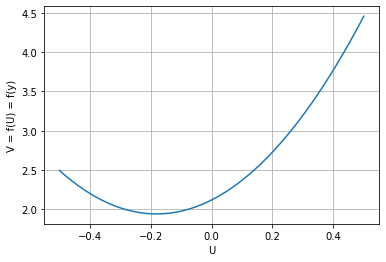

In [9]:
def X(u):
    return 1.4 + 0.1*u

def Y(u):
    return u

def Z(u):
    return 0.4 + 2.1*u

def Q(u):
    return (X(u)**2 + Y(u)**2 + Z(u)**2)

U = np.linspace(-0.5, 0.5, 201)

plt.plot(U, Q(U))
plt.xlabel('U')
plt.ylabel('V = f(U) = f(y)')
plt.grid(True)
plt.show()

In [10]:
from scipy.optimize import fmin

min_arr = fmin(Q, -0.2)
min_u = min_arr[0]
min_x = X(min_u)
min_y = Y(min_u)
min_z = Z(min_u)

print(min_x, min_y, min_z)

Optimization terminated successfully.
         Current function value: 1.942804
         Iterations: 10
         Function evaluations: 20
1.381921875 -0.18078125000000003 0.020359374999999957


In [11]:
# Проверка
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
res_norm = np.linalg.lstsq(A, B)
print(res_norm[0])

[ 1.38191882 -0.18081181  0.0202952 ]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


**6. Найдите одно из псевдорешений вырожденной системы:**

$\left(
\begin{array}{cccc}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\end{array}
\right)\cdot X = \left(\begin{array}{cccc}
2\\5\\11\end{array}\right)
$

Попробуйте также отыскать и нормальное псевдорешенией.

In [12]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
res_norm = np.linalg.lstsq(A, B)
print(res_norm[0])

[-7.69444444 -0.61111111  6.47222222]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until
